In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('./607_cactuBSSN_s_out.csv')
default_rss = 7099.28516

In [6]:
df.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
0,False,True,45837,disabled,14,11,9,26,15,11,...,False,True,8303,136880,53,213,60,always,False,7365.51562
1,True,False,12424,secondary,6,7,7,13,3,79,...,True,False,3772,163179,22,303,34,always,True,7352.01562
2,True,True,31490,primary,9,1,12,6,8,47,...,True,True,14860,224073,69,165,51,default,False,7115.44141
3,False,False,22662,primary,21,15,3,19,11,24,...,False,False,5337,75165,17,394,4,never,True,7084.74609
4,False,True,4879,primary,19,10,16,5,6,65,...,True,True,10479,99381,75,358,14,default,False,7147.70703


In [7]:
df.nsmallest(10, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
35,True,False,2536,primary,12,8,9,20,13,34,...,False,False,10321,186959,59,146,43,never,True,7083.03906
32,True,False,2395,primary,12,8,15,19,13,38,...,False,False,11380,199492,63,146,55,never,False,7083.10156
48,True,False,2536,secondary,12,10,9,19,11,34,...,True,False,9978,180980,59,135,36,never,True,7083.29688
47,True,False,2530,primary,12,8,6,19,13,32,...,False,False,10441,173008,63,116,53,never,False,7083.37500
33,True,False,250,primary,12,8,11,21,13,31,...,False,False,11380,199492,63,146,53,never,True,7083.47656
42,True,False,250,primary,5,7,15,21,11,36,...,False,False,6378,199492,60,126,36,never,True,7083.66016
34,False,False,1500,primary,12,5,13,19,16,38,...,True,False,11380,199492,63,146,55,never,False,7083.82422
45,True,False,1177,primary,9,8,15,22,16,30,...,False,False,11380,159451,63,101,48,never,False,7083.88672
38,True,False,2969,disabled,12,8,11,19,13,33,...,False,False,10617,189319,67,146,47,never,True,7083.96484
25,False,False,2395,primary,13,8,15,15,13,38,...,True,False,12087,199492,63,146,55,never,True,7084.22656


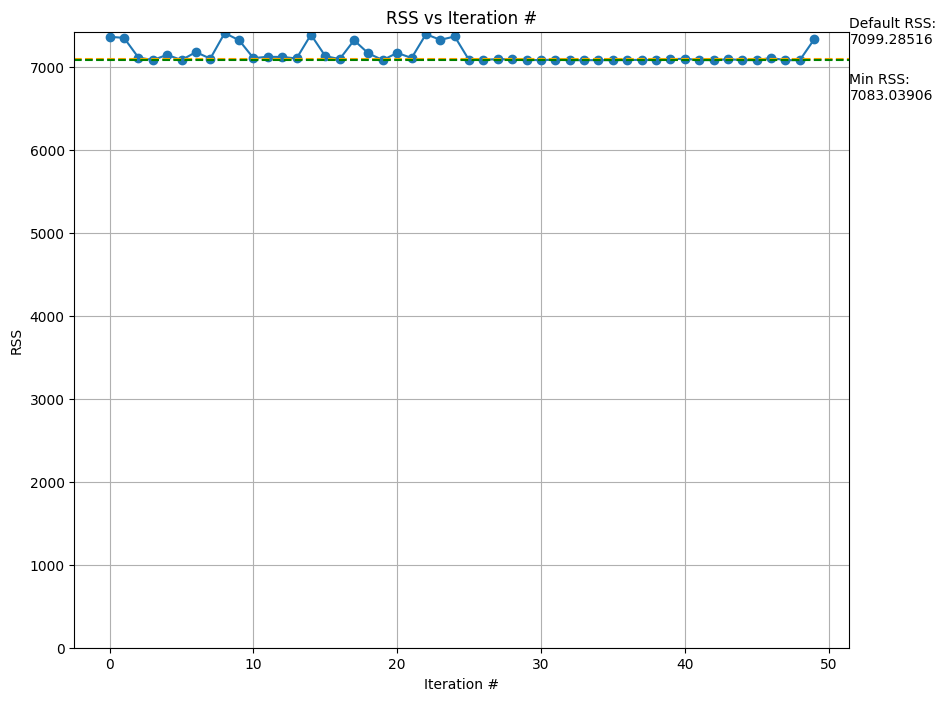

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [9]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(0.2288413499930505)